# Predicting Practice of Exercise During

## Importing packages

In [ ]:
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
source(here('Modules','data_cleaning.R'))
source(here('Modules','unsupervised_learning.R'))
#install_all_packages()
load_library_packages()

## Outliers

#### Outlier: Strange Dont Practice

In [ ]:
pa_dataset_copy <- pa_dataset
pa_dataset_copy["outlier"] <- strange_dp
outliers_result_sdp <- outliers_checker(distances_sdp, pa_dataset_copy, "PA_practice_during")

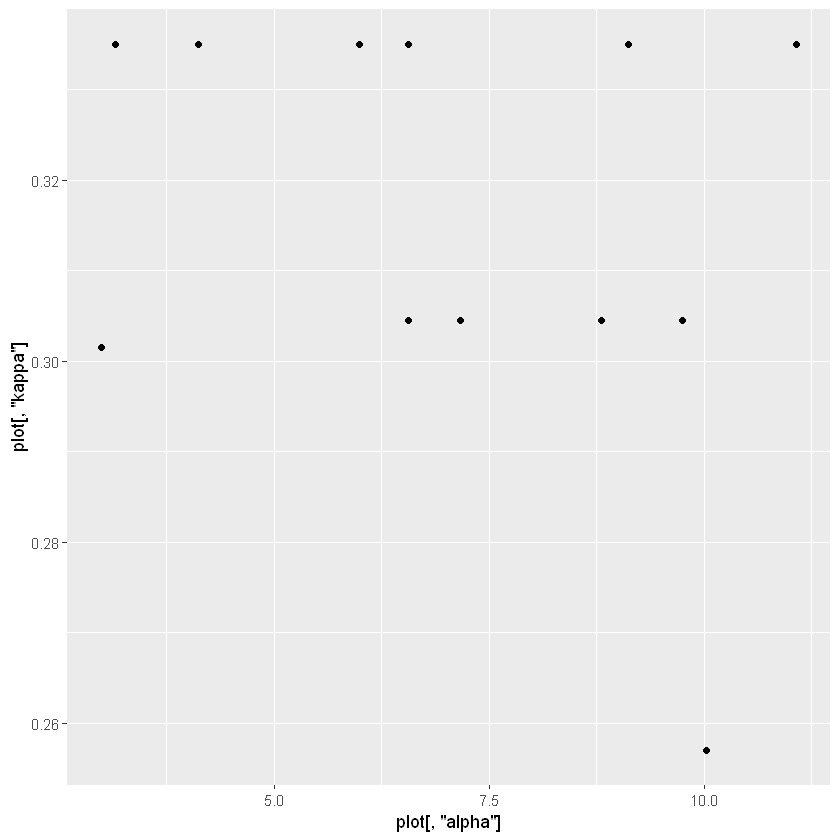

In [3]:
plot <- outliers_result_sdp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

#### Outlier: Strange Practice

In [4]:
pa_dataset_copy <- pa_dataset
pa_dataset_copy["outlier"] <- strange_p
outliers_result_sp <- outliers_checker(distances_sp, pa_dataset_copy, "PA_practice_during")

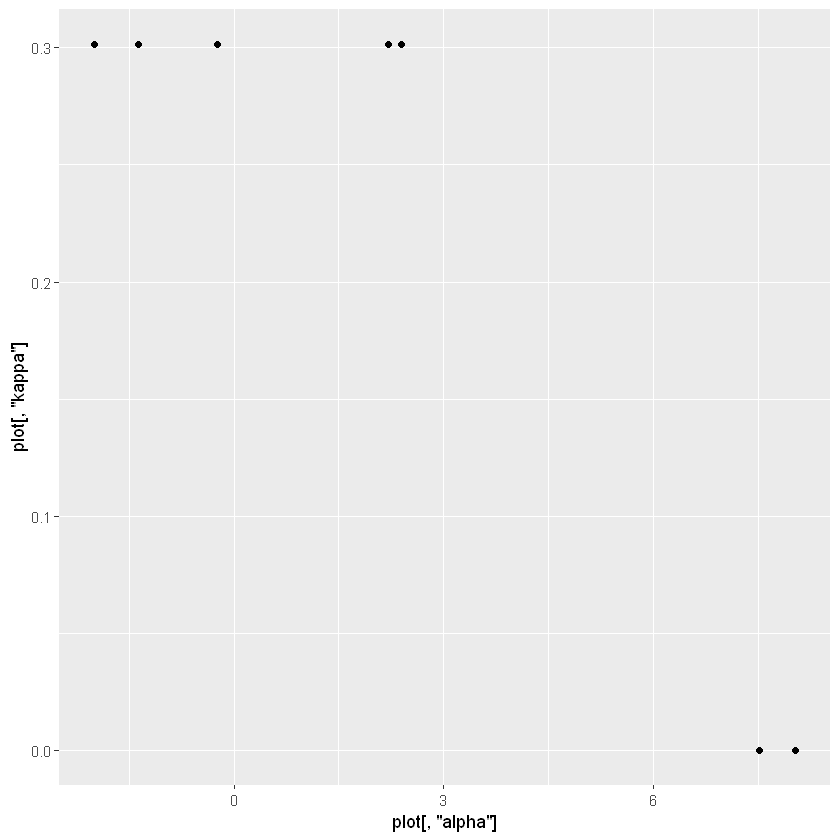

In [5]:
plot <- outliers_result_sp$kappa_x_alpha
ggplot(plot, aes(plot[, "alpha"], plot[, "kappa"] )) + geom_point()

#### New Train and Test
The outliers check in the strange dont practice showed that we should delete 1 record

In [6]:
pa_train <- outliers_result_sdp$best_model$train
pa_test <- outliers_result_sdp$best_model$test

## Models

In [23]:
f1_score <- function (data, lev=NULL, model = NULL){
    fb_val <- FBeta_Score(data$obs, data$pred, beta = 1)
    c(f1_score = fb_val)
}

In [8]:
dim(pa_dataset)

[1] 1242   74

In [9]:
table(pa_dataset[, "PA_practice_during"])


dont_practice      practice 
          346           896 

There is a majority class, we should apply data augmentation. We chose f1 metrict to optimize becouse data is unbalanced.

### Applying augmentation into the training set

In [10]:
set.seed(2)
pa_train.aug <- data_augmentation(
    train_data=pa_train,
    yname="PA_practice_during",
    maj_class = "practice",
    min_classes = c("dont_practice"),
    ycol=match("PA_practice_during",names(pa_dataset))
)

table(pa_train.aug[, "PA_practice_during"])



dont_practice      practice 
          628           628 

### Decision Tree: f1_score Metric without augmentation

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            50       43
  practice                 53      225
                                          
               Accuracy : 0.7412          
                 95% CI : (0.6935, 0.7851)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.2267          
                                          
                  Kappa : 0.335           
                                          
 Mcnemar's Test P-Value : 0.3583          
                                          
            Sensitivity : 0.4854          
            Specificity : 0.8396          
         Pos Pred Value : 0.5376          
         Neg Pred Value : 0.8094          
              Precision : 0.5376          
                 Recall : 0.4854          
                     F1 : 0.5102          
             Prevalence : 0.2776          
         Detection Rate : 0.1348          
   Detec

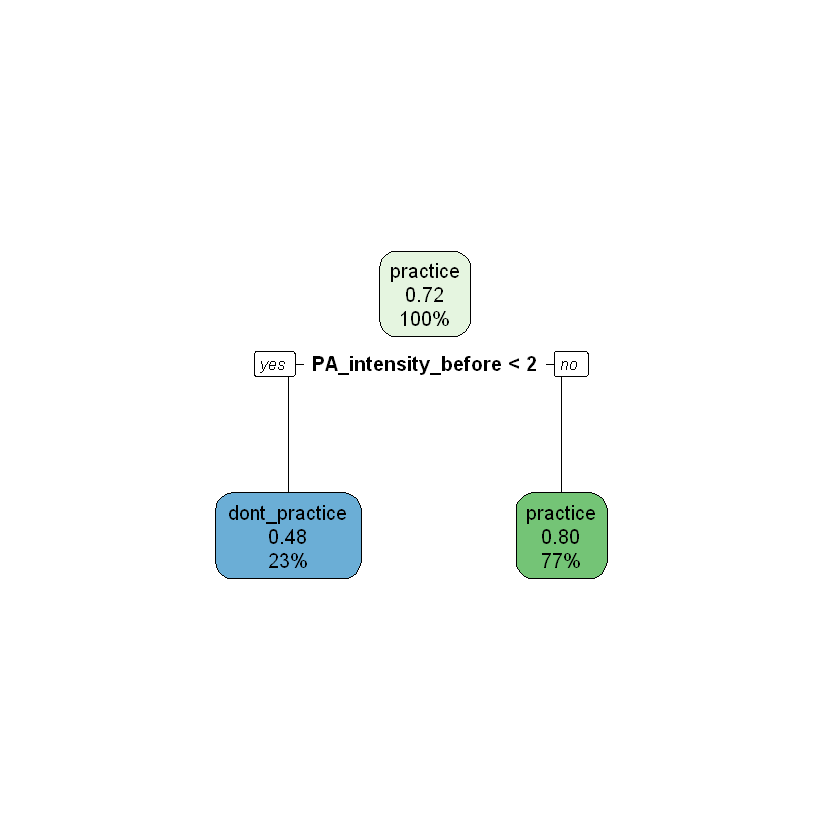

In [17]:
set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="f1_score",
    trControl_func = trainControl(method = "cv", summaryFunction = f1_score),
    train_data = pa_train,
    test_data= pa_test,
    yname="PA_practice_during",
    length = 3
)
print(model$matrix)

rpart.plot(model$result$finalModel)
roc_dt_na <- model$roc

### Decision Tree: f1_score_score Metric with augmentation

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            10       33
  practice                 93      235
                                          
               Accuracy : 0.6604          
                 95% CI : (0.6097, 0.7085)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.9963          
                                          
                  Kappa : -0.0317         
                                          
 Mcnemar's Test P-Value : 1.471e-07       
                                          
            Sensitivity : 0.09709         
            Specificity : 0.87687         
         Pos Pred Value : 0.23256         
         Neg Pred Value : 0.71646         
              Precision : 0.23256         
                 Recall : 0.09709         
                     F1 : 0.13699         
             Prevalence : 0.27763         
         Detection Rate : 0.02695         
   Detec

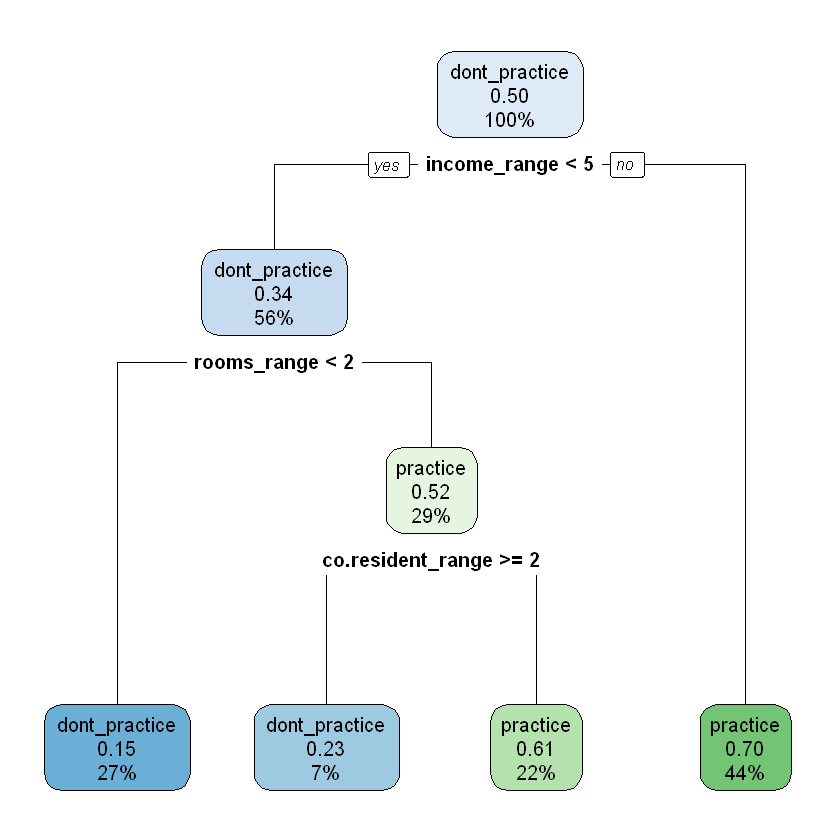

In [21]:

set.seed(2)
model <- fit_model(
    model_method="rpart",
    model_metric="f1_score",
    trControl_func = trainControl(method = "cv", summaryFunction = f1_score),
    train_data = pa_train.aug,
    test_data=pa_test,
    yname="PA_practice_during",
    length=3
)
print(model$matrix)
rpart.plot(model$result$finalModel)
roc_dt_a <- model$roc

### RF: f1 Metric without augmentation


In [22]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="f1_score",
    trControl_func = trainControl(method = "cv", search="grid", summaryFunction = f1_score),
    train_data = pa_train,
    test_data=pa_test,
    yname="PA_practice_during",
    length = 15
)
print(model$matrix)
roc_rf_na <- model$roc

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            44       28
  practice                 59      240
                                         
               Accuracy : 0.7655         
                 95% CI : (0.719, 0.8077)
    No Information Rate : 0.7224         
    P-Value [Acc > NIR] : 0.034526       
                                         
                  Kappa : 0.3557         
                                         
 Mcnemar's Test P-Value : 0.001298       
                                         
            Sensitivity : 0.4272         
            Specificity : 0.8955         
         Pos Pred Value : 0.6111         
         Neg Pred Value : 0.8027         
              Precision : 0.6111         
                 Recall : 0.4272         
                     F1 : 0.5029         
             Prevalence : 0.2776         
         Detection Rate : 0.1186         
   Detection Prevalence : 0

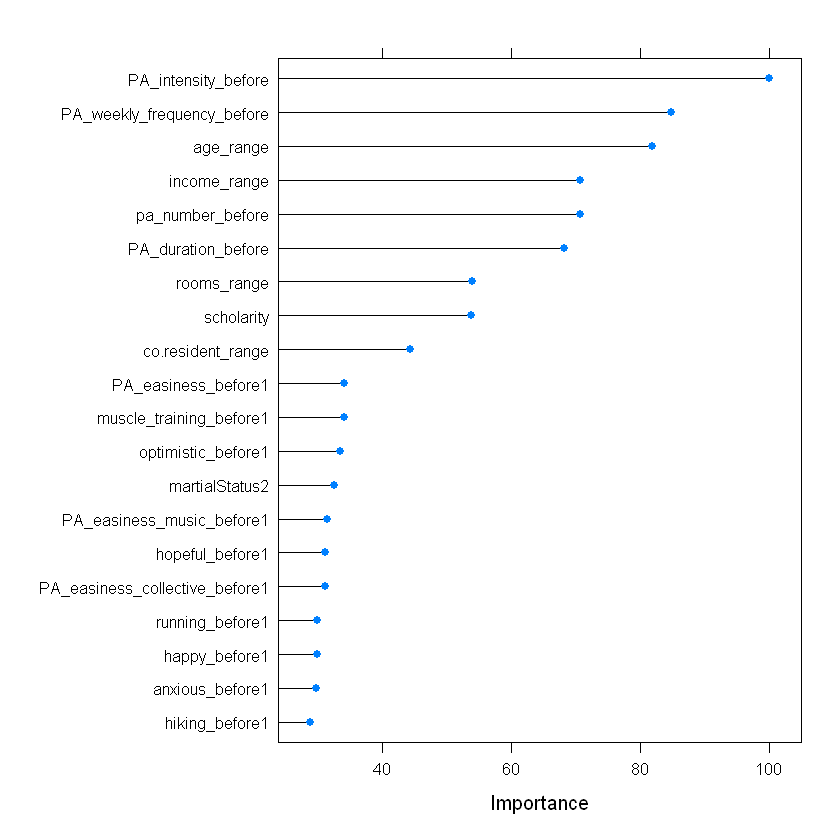

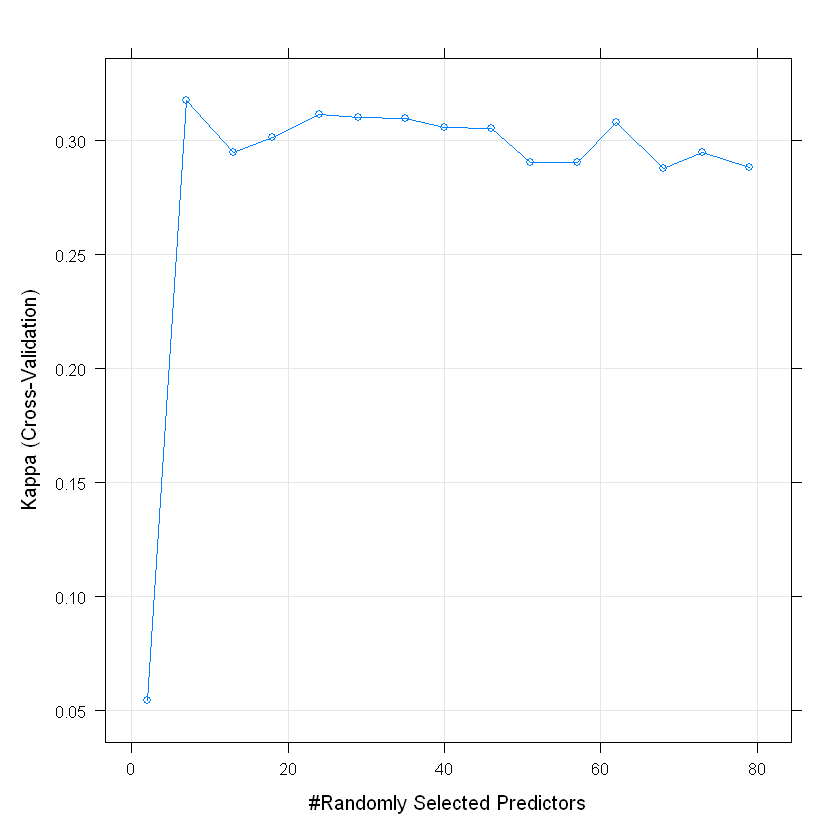

In [ ]:
plot(varImp(model$result), top=20)
plot(model$result)


### RF: f1 metric with augmentation

In [11]:
set.seed(2)
model <- fit_model(
    model_method="rf",
    model_metric="f1",
    trControl_func = trainControl(method = "cv", search="grid", summaryFunction = f1),
    train_data = pa_train.aug,
    test_data=pa_test,
    yname="PA_practice_during",
    length = 15
)
print(model$matrix)
roc_rf_a <- model$roc

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            47       23
  practice                 56      245
                                          
               Accuracy : 0.7871          
                 95% CI : (0.7418, 0.8276)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.0026512       
                                          
                  Kappa : 0.411           
                                          
 Mcnemar's Test P-Value : 0.0003179       
                                          
            Sensitivity : 0.4563          
            Specificity : 0.9142          
         Pos Pred Value : 0.6714          
         Neg Pred Value : 0.8140          
              Precision : 0.6714          
                 Recall : 0.4563          
                     F1 : 0.5434          
             Prevalence : 0.2776          
         Detection Rate : 0.1267          
   Detec

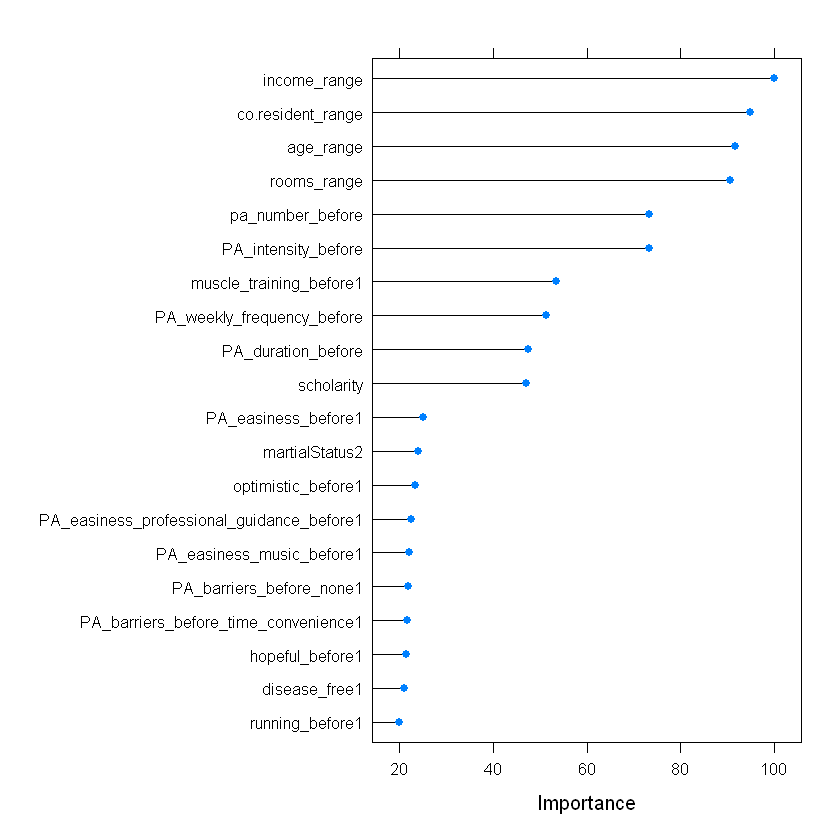

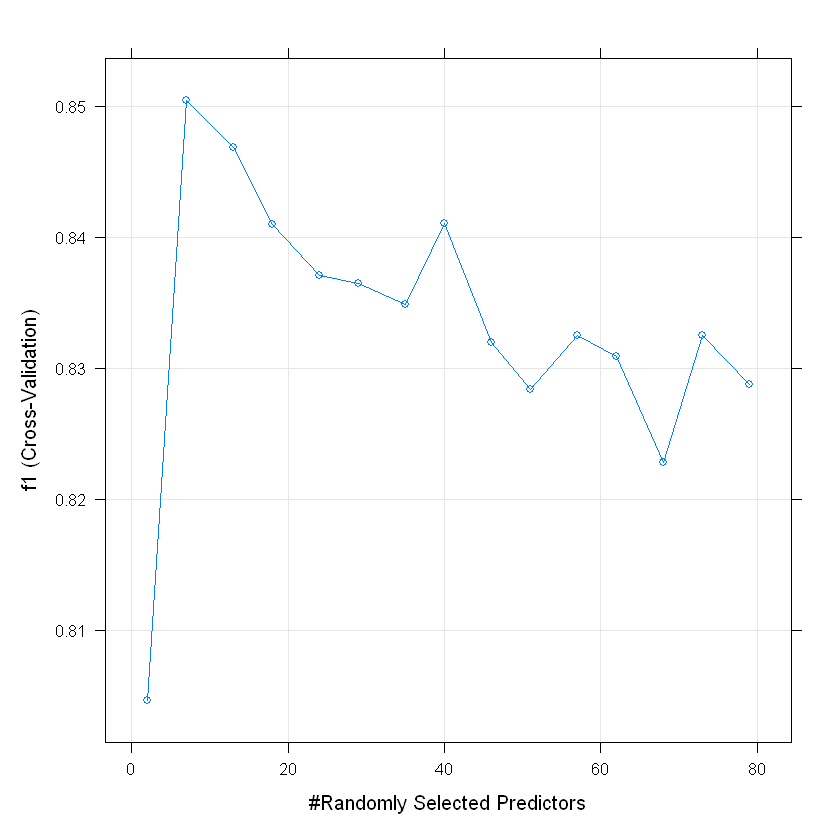

In [12]:
plot(varImp(model$result), top=20)
plot(model$result)


## Roc Results


In [ ]:
ggroc(list(DT_not_augmented = roc_dt_na,
            DT_augmented = roc_dt_a, 
            RF_not_augmented = roc_rf_na, 
            RF_augmented = roc_rf_a))

## Sensibility and Specificity Analysis

### Vectorized Metrics

In [25]:
# f1 <- function(ths){
    
#   diff <- abs(ths$Sensitivity - ths$Specificity)
#   indexOfMin = match(min(diff), diff)
#   return(ths[indexOfMin, "prob_threshold"])
# }

f2 <- function(ths){
    desv <- function(x){
      sd(c(unname(x["Sensitivity"]), unname(x["Specificity"])))
    }
    avg <- (ths$Sensitivity + ths$Specificity)/2
    deviation <- apply(ths, desv, MARGIN=1)
    metric <- avg - deviation
    indexOfMin = match(max(metric), metric)
    return(ths[indexOfMin, "prob_threshold"])
}

#### Find Optimal threshhold

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Pos Pred Value', 'Precision', 'F1'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Pos Pred Value', 'Precision', 'F1'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Pos Pred Value', 'Precision', 'F1'.
"
Warning message in .fun(piece, ...):
"The following columns have missing values (NA), which have been removed: 'Pos Pred Value', 'Precision', 'F1'.
"


[1] 0.32
Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            75       79
  practice                 28      189
                                          
               Accuracy : 0.7116          
                 95% CI : (0.6626, 0.7572)
    No Information Rate : 0.7224          
    P-Value [Acc > NIR] : 0.7012          
                                          
                  Kappa : 0.3761          
                                          
 Mcnemar's Test P-Value : 1.34e-06        
                                          
            Sensitivity : 0.7282          
            Specificity : 0.7052          
         Pos Pred Value : 0.4870          
         Neg Pred Value : 0.8710          
              Precision : 0.4870          
                 Recall : 0.7282          
                     F1 : 0.5837          
             Prevalence : 0.2776          
         Detection Rate : 0.2022          

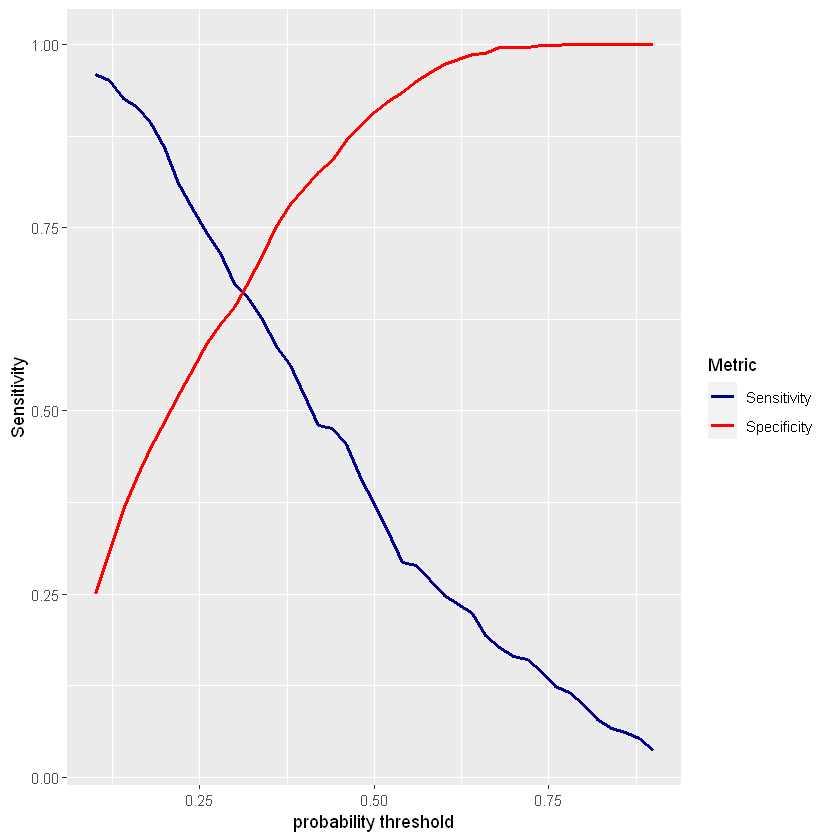

In [26]:
source(here('Modules','modules.R'))
set.seed(2)
model <- fit_model_thresholder(
    model_method="rf",
    model_metric="f1_score",
    trControl_func = trainControl( summaryFunction = f1_score, method = "cv", search="grid",  classProbs=TRUE, savePredictions=TRUE),
    train_data = pa_train,
    test_data=pa_test,
    yname="PA_practice_during",
    length = 15,
    best_th = f2
)

print(model$matrix)